In [229]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns

In [223]:
df_scores = pd.read_csv('df_scores_super_master.csv')
df_teams_stats = pd.read_csv('df_team_stat_super_master.csv')
df_player_stats = pd.read_csv('df_player_stat_super_master.csv')

In [224]:
df_scores.drop(columns = ['Unnamed: 0'], inplace = True)
df_teams_stats.drop(columns = ['Unnamed: 0'], inplace = True)
df_player_stats.drop(columns = ['Unnamed: 0'], inplace = True)

#convert Date to datatetime
df_scores['Date'] = pd.to_datetime(df_scores['Date'], yearfirst = False)
df_teams_stats['Date'] = pd.to_datetime(df_teams_stats['Date'], yearfirst = False)
df_player_stats['Date'] = pd.to_datetime(df_player_stats['Date'], yearfirst = False)

In [225]:
def select_season(df, season):
    """
    Args: Master dataframe, and first year of the season we want to retrieve (2010 means we are gonna
    retrieve the 2010-2011 season)
    Return: DataFrame of with all games of the season
    """
    
    #I consider that the first July the season as NBA hollidays
    #so for the upcoming year the season will finished at this date
    #for the current year we take all games after this date
    
    #we can make something more sophisticated if we want
    
    date_limit_up = datetime.datetime(season+1, 7, 1)
    date_limit_down = datetime.datetime(season, 7, 1)
    df_copy = df.copy()
    return df_copy[(date_limit_down < df_copy['Date']) &  (df_copy['Date'] < date_limit_up)]

def list_to_string(l):
    res = ''
    for element in l:
        res += element + ', '
    return res

def test_write_team_typing(df, team, stats = False):
    """
    Args: df of scores
    """
    if stats == False:   
        teams = df['Visitor'].unique()
        if team not in teams:
            raise ValueError('Please select a team inside the following: ' + list_to_string(teams))
    elif stats == True:
        teams = df['TEAM'].unique()
        if team not in teams:
            raise ValueError('Please select a team inside the following: ' + list_to_string(teams))
    
def select_team(df, team, stats = False):
    """
    Args: df: DataFrame score or a DataFrame with the same structure
    
    retrun: DataFrame with just the game played by a team
    """

    test_write_team_typing(df, team, stats)
    
    df_copy = df.copy()
    if stats == False:  
        df_res = df_copy[(df_copy['Visitor'] == team) | (df_copy['Home'] == team)]
    elif stats == True:
        df_res = df_copy[(df_copy['TEAM'] == team)]
    return df_res

In [226]:
df_2015 = select_season(df_scores, 2015)
df_2015

,GAMEID,Visitor,VisitorScore,Home,HomeScore,Date
5536,5551,Pistons,106,Hawks,94,2015-10-27
5537,5552,Cavaliers,95,Bulls,97,2015-10-27
5538,5553,Pelicans,95,Warriors,111,2015-10-27
5539,5554,Wizards,88,Magic,87,2015-10-28
5540,5555,76ers,95,Celtics,112,2015-10-28
...,...,...,...,...,...,...
6761,6779,Pelicans,109,Timberwolves,144,2016-04-13
6762,6780,Grizzlies,104,Warriors,125,2016-04-13
6763,6781,Jazz,96,Lakers,101,2016-04-13
6764,6782,Clippers,105,Suns,114,2016-04-13


In [227]:
df_team_2015 = select_season(df_teams_stats, 2015)
df_team_2015

,TEAM,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,...,STL,BLK,TO,PF,PTS,+/-,HOME,GAMEID,Date,WIN
11008,Pistons,37,96,38.5,12,29,41.4,20,26,76.9,...,5,3,15,15,106,12,0,5551,2015-10-27,1
11009,Hawks,37,82,45.1,8,27,29.6,12,15,80.0,...,9,4,15,25,94,-12,1,5551,2015-10-27,0
11010,Cavaliers,38,94,40.4,9,29,31.0,10,17,58.8,...,5,7,10,21,95,-2,0,5552,2015-10-27,0
11011,Bulls,37,87,42.5,7,19,36.8,16,23,69.6,...,6,10,13,22,97,2,1,5552,2015-10-27,1
11012,Pelicans,35,83,42.2,6,18,33.3,19,27,70.4,...,9,3,18,26,95,-16,0,5553,2015-10-27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13463,Lakers,41,85,48.2,6,25,24.0,13,15,86.7,...,6,3,13,17,101,5,1,6781,2016-04-13,1
13464,Clippers,43,96,44.8,9,31,29.0,10,12,83.3,...,9,6,15,20,105,-9,0,6782,2016-04-13,0
13465,Suns,45,99,45.5,7,26,26.9,17,22,77.3,...,10,5,16,15,114,9,1,6782,2016-04-13,1
13466,Nuggets,40,94,42.6,7,25,28.0,12,18,66.7,...,10,6,20,19,99,-8,0,6783,2016-04-13,0


In [39]:
df_lakers = select_team(df_2015, 'Lakers', stats = False)
df_lakers

,GAMEID,Visitor,VisitorScore,Home,HomeScore,Date
5552,5567,Timberwolves,112,Lakers,111,2015-10-28
5566,5581,Lakers,114,Kings,132,2015-10-30
5580,5595,Mavericks,103,Lakers,93,2015-11-01
5594,5609,Nuggets,120,Lakers,109,2015-11-03
5612,5627,Lakers,104,Nets,98,2015-11-06
...,...,...,...,...,...,...
6707,6725,Clippers,91,Lakers,81,2016-04-06
6719,6737,Lakers,102,Pelicans,110,2016-04-08
6730,6748,Lakers,110,Rockets,130,2016-04-10
6744,6762,Lakers,79,Thunder,112,2016-04-11


In [40]:
df_team_lakers = select_team(df_team_2015, 'Lakers', stats = True)
df_team_lakers

,TEAM,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,...,STL,BLK,TO,PF,PTS,+/-,HOME,GAMEID,Date,WIN
11041,Lakers,35,90.0,38.9,9,34.0,26.5,32,35.0,91.4,...,2,4,13,29,111,-1.0,1,5567,2015-10-28,0
11068,Lakers,41,89.0,46.1,11,34.0,32.4,21,27.0,77.8,...,7,9,19,24,114,-18.0,0,5581,2015-10-30,0
11097,Lakers,31,85.0,36.5,10,34.0,29.4,21,28.0,75.0,...,8,9,12,20,93,-10.0,1,5595,2015-11-01,0
11125,Lakers,36,86.0,41.9,6,26.0,23.1,31,38.0,81.6,...,9,4,10,28,109,-11.0,1,5609,2015-11-03,0
11160,Lakers,33,78.0,42.3,7,23.0,30.4,31,40.0,77.5,...,9,6,15,22,104,6.0,0,5627,2015-11-06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13351,Lakers,32,90.0,35.6,4,19.0,21.1,13,17.0,76.5,...,6,1,12,16,81,-10.0,1,6725,2016-04-06,0
13374,Lakers,34,81.0,42.0,11,24.0,45.8,23,27.0,85.2,...,9,5,13,23,102,-8.0,0,6737,2016-04-08,0
13396,Lakers,41,83.0,49.4,12,28.0,42.9,16,19.0,84.2,...,10,3,18,15,110,-20.0,0,6748,2016-04-10,0
13424,Lakers,23,81.0,28.4,7,31.0,22.6,26,30.0,86.7,...,8,1,15,20,79,-33.0,0,6762,2016-04-11,0


C:\Users\harol\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-53-7d975bb17296>:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  hist = win_df.hist(ax = ax)


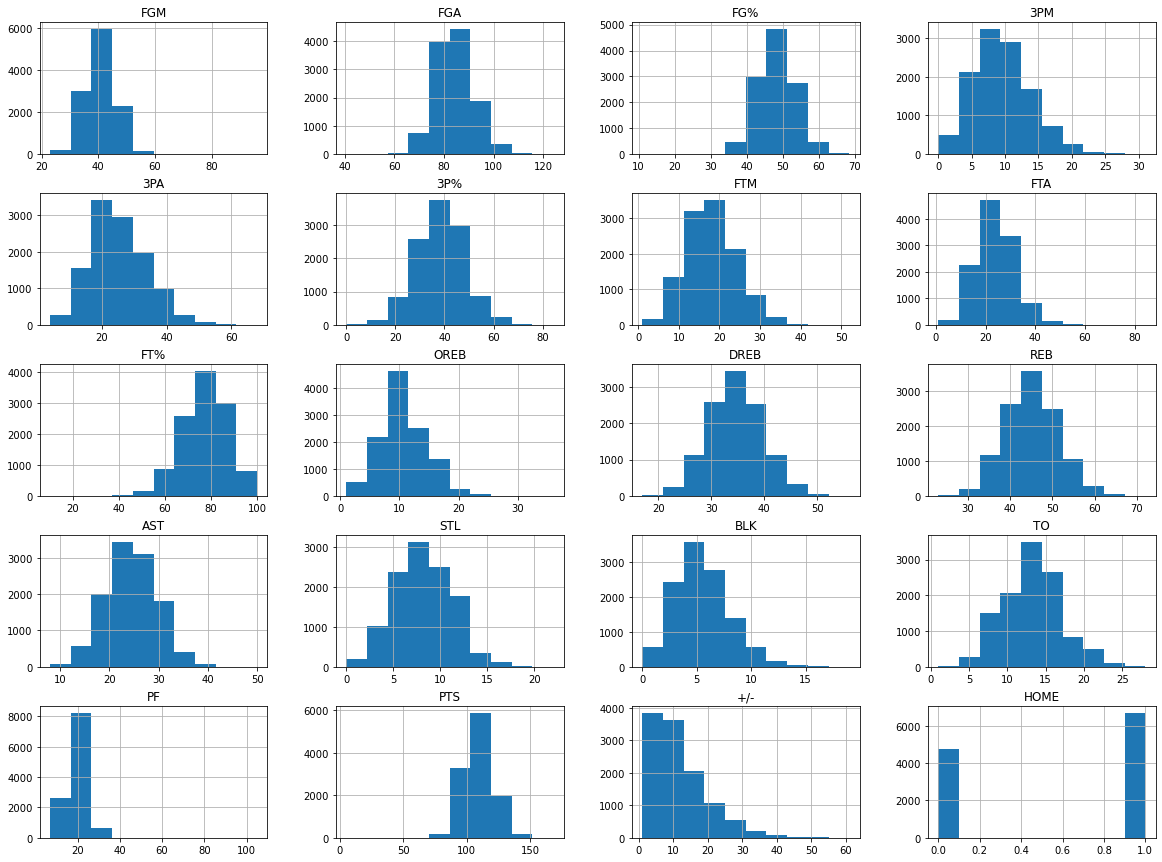

<ipython-input-53-7d975bb17296>:17: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  hist_l = lose_df.hist(ax = ax)


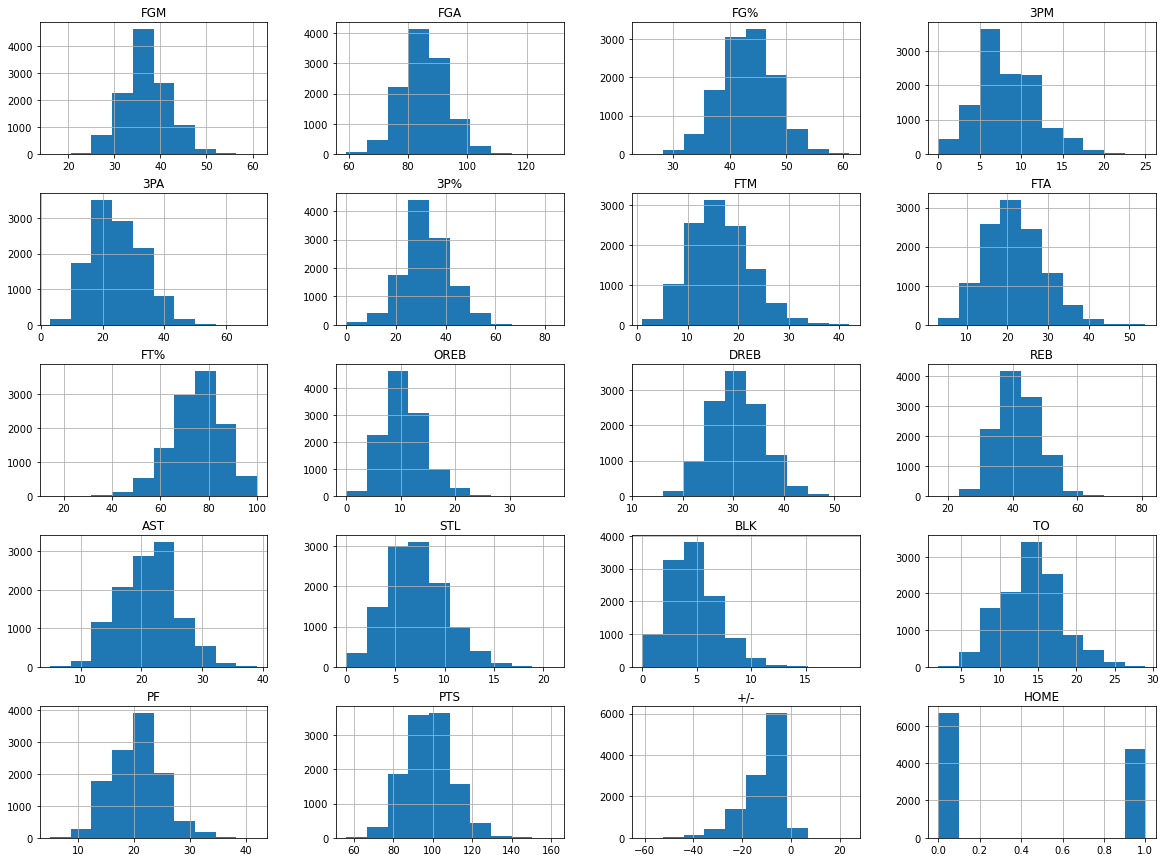

In [53]:
seasons = np.arange(2010, 2020)
seasons[-1] = 2020
season = 2015
df_team = df_teams_stats.copy()
df_team_season = select_season(df_teams_stats, season)
win_df = df_team[(df_team['WIN'] == 1)]
lose_df = df_team[df_team['WIN'] == 0]
win_df.drop(columns = ['GAMEID', 'Date', 'WIN'], inplace = True)
lose_df.drop(columns = ['GAMEID', 'Date', 'WIN'], inplace = True)
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
hist = win_df.hist(ax = ax)
plt.show()

fig = plt.figure(figsize = (20,15))
ax = fig.gca()
hist_l = lose_df.hist(ax = ax)
plt.show()

In [230]:
#computation of ELO statistics
def new_elo(elo, k, S_team, E_team):
    return k*(S_team - E_team) + elo

def compute_E_team(team_elo, opp_elo):
    den = 1 + 10**((opp_elo - team_elo) /400)
    return (1 / den)

def new_season_elo(elo):
    return (elo*0.75) + (0.25*1505)

def compute_k(point_A, point_B, elo_A, elo_B):
    MOV = np.abs(point_A - point_B)
    elo_diff = np.abs(elo_A - elo_B)
    num = (MOV + 3)**(0.8)
    den = 7.5 + 0.006*elo_diff
    return 20*(num/den)

def init_elo(teams):
    dic = {}
    for team in teams:
        dic[team] = [1500]
    return dic


def compute_elo_season(df_scores, season, elo_dic):    
    df = select_season(df_scores, season)
    for i in range(df.shape[0]):
        visitor_team, visitor_point = df.iloc[i]['Visitor'], df.iloc[i]['VisitorScore']
        home_team, home_point = df.iloc[i]['Home'], df.iloc[i]['HomeScore']
        visitor_elo = elo_dic[visitor_team][-1]
        home_elo = elo_dic[home_team][-1]
        k = compute_k(home_point, visitor_point, home_elo, visitor_elo)
        #k = 20
        #print('k', k)
        if visitor_point < home_point:
            #compute elo for home team
            S_team = 1
            E_team = compute_E_team(home_elo, visitor_elo)
            new_home_elo = new_elo(home_elo, k, S_team, E_team)
            elo_dic[home_team].append(new_home_elo)
            
            #compute elo for away team
            S_team = 0
            E_team = compute_E_team(visitor_elo, home_elo)
            new_visit_elo = new_elo(visitor_elo, k, S_team, E_team)
            elo_dic[visitor_team].append(new_visit_elo)
            #print(new_home_elo, new_visit_elo)
            
        
        elif home_point < visitor_point:
            #compute elo for home team
            S_team = 0
            E_team = compute_E_team(home_elo, visitor_elo)
            new_home_elo = new_elo(home_elo, k, S_team, E_team)
            elo_dic[home_team].append(new_home_elo)
            
            #compute elo for away team
            S_team = 1
            E_team = compute_E_team(visitor_elo, home_elo)
            new_visit_elo = new_elo(visitor_elo, k, S_team, E_team)
            elo_dic[visitor_team].append(new_visit_elo)
            #print(new_home_elo, new_visit_elo)
    
    return elo_dic
            

def compute_elo_several_seasons(df_scores, df_team_stats, seasons):
    teams = df_team_stats['TEAM'].unique()
    elo_dic = init_elo(teams)
    for season in seasons:
        elo_dic = compute_elo_season(df_scores, season, elo_dic)
        for team in teams:
            elo_new = new_season_elo(elo_dic[team][-1])
            elo_dic[team].append(elo_new)
    return elo_dic
    
    
def calendar_team(df_scores, df_teams_stats, seasons):
    date_dic = {}
    teams = df_teams_stats['TEAM'].unique()
    first_date = df_scores.iloc[0]['Date']
    for team in teams:
        date_dic[team] = [first_date]
    for season in seasons:
        df = select_season(df_scores, season)
        for i in range(df.shape[0]):
            date = df.iloc[i]['Date']
            home_team, visit_team = df.iloc[i]['Home'], df.iloc[i]['Visitor']
            date_dic[home_team].append(date)
            date_dic[visit_team].append(date)
        last_date = df.iloc[-1]['Date']
        for team in teams:
            date_dic[team].append(last_date)
    return date_dic

In [232]:
#teams = df_teams_stats['TEAM'].unique()
#elo_dic = init_elo(teams)
#res = compute_elo_season(df_scores, 2010, elo_dic)

seasons = np.arange(2010, 2021)
print(seasons)

res = compute_elo_several_seasons(df_scores, df_teams_stats, seasons)
dates = calendar_team(df_scores, df_teams_stats, seasons)
print(len(res['Lakers']))
print(len(dates['Lakers']))

[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
842
842


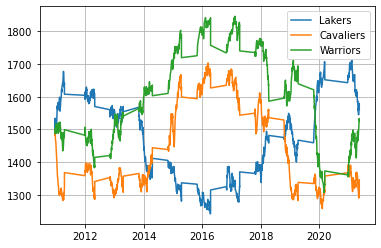

In [233]:
date = dates['Lakers']
plt.plot(dates['Lakers'], res['Lakers'], label = 'Lakers')
plt.plot(dates['Cavaliers'], res['Cavaliers'], label = 'Cavaliers')
plt.plot(dates['Warriors'], res['Warriors'], label = 'Warriors')
#plt.xticks(x_i, date)
plt.legend()
plt.grid()
plt.show()

In [280]:
df_teams_stats[df_teams_stats['TEAM'] == 'Lakers']

,TEAM,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,...,STL,BLK,TO,PF,PTS,+/-,HOME,GAMEID,Date,WIN
0,Lakers,42,82,51.2,8,17,47.1,17,24,70.8,...,2,5,8,22,109,15,0,0,2010-12-15,1
32,Lakers,33,79,41.8,3,15,20.0,24,28,85.7,...,8,2,14,17,93,12,0,16,2010-12-17,1
70,Lakers,41,79,51.9,7,19,36.8,31,39,79.5,...,9,4,17,21,120,10,0,35,2010-12-19,1
107,Lakers,35,77,45.5,2,13,15.4,7,13,53.8,...,6,5,16,19,79,-19,1,53,2010-12-21,0
137,Lakers,32,79,40.5,6,19,31.6,10,15,66.7,...,4,1,12,23,80,-16,1,68,2010-12-25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24783,Lakers,39,80,48.7,13,30,43.3,32,41,78.0,...,11,3,13,21,123,13,1,12456,2021-05-09,1
24819,Lakers,37,89,41.6,12,28,42.9,15,19,78.9,...,5,5,18,17,101,2,1,12474,2021-05-11,1
24831,Lakers,52,91,57.1,7,20,35.0,13,22,59.1,...,8,3,11,20,124,2,1,12480,2021-05-12,1
24868,Lakers,41,86,47.7,11,29,37.9,29,36,80.6,...,5,3,13,15,122,7,0,12499,2021-05-15,1


In [347]:
def get_avg_stats_last_games(df_teams_stats, team, game_date, n):
    df_team = select_team(df_teams_stats, team, stats = True)
    df_team = df_team.copy()
    df_team_before_game = df_team[df_team['Date'] < game_date]
    piv = max(0,  df_team_before_game.shape[0] - n)
    df_n_last_stats = df_team_before_game[piv:]
    df_n_last_stats.drop(columns = ['Date', 'GAMEID', 'WIN', 'TEAM'], inplace = True)
    output = df_n_last_stats.mean()
    if np.all(np.isnan(output.values)) == True:
        output = np.zeros(output.shape)
        return output
    else:
        return output.values

get_avg_stats_last_games(df_teams_stats, 'Lakers', datetime.datetime(2010, 12, 19), 10)

array([ 37.5 ,  80.5 ,  46.5 ,   5.5 ,  16.  ,  33.55,  20.5 ,  26.  ,
        78.25,  10.5 ,  38.5 ,  49.  ,  23.5 ,   5.  ,   3.5 ,  11.  ,
        19.5 , 101.  ,  13.5 ,   0.  ])

First try we are gonna give as features for the prediction the average of the statistics of the team the last 10 games.

First example, working with the Boston Celtics

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [357]:
df_boston = select_team(df_teams_stats, 'Celtics', stats = True)
df_boston = select_season(df_boston, 2018)
df_boston_w = df_boston.copy()
df_boston_w = df_boston[10:]

game_dates = df_boston_w['Date']
n_rows = df_boston_w.shape[0]
n_columns = df_boston_w.drop(columns = ['Date', 'GAMEID', 'WIN', 'TEAM']).shape[1]
X = np.zeros((n_rows, n_columns))
for i, game_date in enumerate(game_dates):
    avg_stats = get_avg_stats_last_games(df_teams_stats.copy(), 'Celtics', game_date, 10)
    X[i] = avg_stats
    
y = df_boston_w['WIN'].to_numpy()
print(X.shape, y.shape)

scaler = StandardScaler()
scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
print(y_train.shape, y_test.shape)
print(y_test)

C:\Users\harol\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(72, 20) (72,)
(57,) (15,)
[1 1 1 1 1 0 0 0 0 1 1 0 0 1 1]


In [199]:
#Logistic Regression
model = LogisticRegression(fit_intercept = False)
model.fit(X_train, y_train)
yhat = model.predict(X_test)

print('Accuracy')
acc = np.round_(y_test[yhat == y_test].shape[0] / y_test.shape[0], 2)
print(acc)
print('')
print('Classification report')
print(classification_report(y_test, yhat))

Accuracy
0.53

Classification report
              precision    recall  f1-score   support

           0       0.40      0.33      0.36         6
           1       0.60      0.67      0.63         9

    accuracy                           0.53        15
   macro avg       0.50      0.50      0.50        15
weighted avg       0.52      0.53      0.52        15



C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [200]:
#SVM
y_train[y_train == 0] =  -1
y_test[y_test == 0] = -1
model = SVC(kernel = 'rbf')
model.fit(X_train, y_train)
yhat = model.predict(X_test)

print(y_test, yhat)
y_test[y_test == -1] = 0
yhat[yhat == -1] = 0

print('Accuracy')
acc = np.round_(y_test[yhat == y_test].shape[0] / y_test.shape[0], 2)
print(acc)
print('')
print('Classification report')
print(classification_report(y_test, yhat))

[ 1 -1 -1  1  1  1 -1  1  1 -1  1  1 -1 -1  1] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 0 1 1 1 0 1 1 0 1 1 0 0 1] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy
0.6

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.60      1.00      0.75         9

    accuracy                           0.60        15
   macro avg       0.30      0.50      0.37        15
weighted avg       0.36      0.60      0.45        15



C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [236]:
df_boston = select_team(df_teams_stats, 'Celtics', stats = True)
df_boston_w = df_boston.copy()
df_boston_w = df_boston[10:]

game_dates = df_boston_w['Date']
n_rows = df_boston_w.shape[0]
n_columns = df_boston_w.drop(columns = ['Date', 'GAMEID', 'WIN', 'TEAM']).shape[1]
X = np.zeros((n_rows, n_columns))
for i, game_date in enumerate(game_dates):
    avg_stats = get_avg_stats_last_games(df_teams_stats, 'Celtics', game_date, 10)
    X[i] = avg_stats.values

y = df_boston_w['WIN'].to_numpy()
print(X.shape, y.shape)

scaler = StandardScaler()
scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
print(y_train.shape, y_test.shape)

#Logistic Regression
model = LogisticRegression(fit_intercept = False)
model.fit(X_train, y_train)
yhat = model.predict(X_test)

print('Accuracy')
acc = np.round_(y_test[yhat == y_test].shape[0] / y_test.shape[0], 2)
print(acc)
print('')
print('Classification report')
print(classification_report(y_test, yhat))

#SVM
y_train[y_train == 0] =  -1
y_test[y_test == 0] = -1
model = SVC(kernel = 'rbf')
model.fit(X_train, y_train)
yhat = model.predict(X_test)

y_test[y_test == -1] = 0
yhat[yhat == -1] = 0

print('Accuracy')
acc = np.round_(y_test[yhat == y_test].shape[0] / y_test.shape[0], 2)
print(acc)
print('')
print('Classification report')
print(classification_report(y_test, yhat))

(821, 20) (821,)
(656,) (165,)
Accuracy
0.58

Classification report
              precision    recall  f1-score   support

           0       0.53      0.41      0.46        73
           1       0.60      0.71      0.65        92

    accuracy                           0.58       165
   macro avg       0.56      0.56      0.56       165
weighted avg       0.57      0.58      0.57       165

Accuracy
0.56

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.56      1.00      0.72        92

    accuracy                           0.56       165
   macro avg       0.28      0.50      0.36       165
weighted avg       0.31      0.56      0.40       165



C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

Don't give good accuracy

In [237]:
def find_index_dates(dates_dic, team, date):
    l = dates[team]
    for k in range(len(l)):
        if l[k] == date:
            return k

def add_elo(df_w, df_scores, df_teams_stats, elo_dic, dates_dic):
    df = df_w.copy()
    seasons = np.arange(2010, 2020)
    seasons[-1] = 2020
    for i in range(df.shape[0]):
        team = df.iloc[i]['TEAM']
        date = df.iloc[i]['Date']
        idx = find_index_dates(dates_dic, team, date)
        elo_ = elo_dic[team][idx]
        df.loc[i, 'ELO'] = elo_
    return df

new_df = add_elo(df_teams_stats, df_scores, df_teams_stats, res, dates)
new_df

,TEAM,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,...,BLK,TO,PF,PTS,+/-,HOME,GAMEID,Date,WIN,ELO
0,Lakers,42,82,51.2,8,17,47.1,17,24,70.8,...,5,8,22,109,15,0,0,2010-12-15,1,1500.000000
1,Pacers,38,81,46.9,6,21,28.6,12,16,75.0,...,6,6,16,94,-15,1,0,2010-12-15,0,1500.000000
2,Celtics,45,86,52.3,7,14,50.0,21,21,100.0,...,2,13,19,118,2,0,1,2010-12-15,1,1500.000000
3,Knicks,43,81,53.1,9,23,39.1,21,26,80.8,...,5,17,18,116,-2,1,1,2010-12-15,0,1500.000000
4,Clippers,33,83,39.8,5,19,26.3,20,27,74.1,...,4,14,18,91,-14,0,2,2010-12-15,0,1500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24903,Thunder,50,94,53.2,8,26,30.8,9,16,56.3,...,12,15,11,117,5,1,12516,2021-05-16,1,1248.023573
24904,Nuggets,44,98,44.9,14,37,37.8,14,15,93.3,...,2,6,20,116,-16,0,12517,2021-05-16,0,1644.328306
24905,Trail Blazers,46,87,52.9,18,43,41.9,22,26,84.6,...,6,13,16,132,16,1,12517,2021-05-16,1,1603.585186
24906,Jazz,41,86,47.7,18,39,46.2,21,25,84.0,...,3,16,14,121,22,0,12518,2021-05-16,1,1695.770985


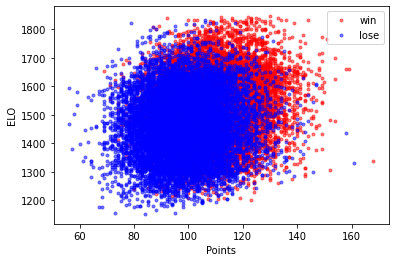

In [244]:
plt.plot(new_df['PTS'][new_df['WIN'] == 1], new_df['ELO'][new_df['WIN'] == 1],'r.', label='win', alpha = 0.5)
plt.plot(new_df['PTS'][new_df['WIN'] == 0], new_df['ELO'][new_df['WIN'] == 0],'b.', label='lose', alpha = 0.5)
plt.xlabel('Points')
plt.ylabel('ELO')
plt.legend()
plt.show()

In [251]:
import warnings
warnings.filterwarnings("ignore", message="ConvergenceWarning")
warnings.filterwarnings("ignore", message="Estimator fit failed. The score on this train-test")
warnings.filterwarnings("ignore", message="The max_iter was reached which means")

In [305]:
df_boston = select_team(new_df, 'Celtics', stats = True)
df_boston_w = df_boston.copy()
df_boston_w = df_boston[10:]

game_dates = df_boston_w['Date']
n_rows = df_boston_w.shape[0]
n_columns = df_boston_w.drop(columns = ['Date', 'GAMEID', 'WIN', 'TEAM']).shape[1]
X = np.zeros((n_rows, n_columns))
for i, game_date in enumerate(game_dates):
    avg_stats = get_avg_stats_last_games(new_df, 'Celtics', game_date, 10)
    X[i] = avg_stats
y = df_boston_w['WIN'].to_numpy()
print(X.shape, y.shape)

scaler = StandardScaler()
scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
print(y_train.shape, y_test.shape)

#Logistic Regression
print('----Logistic Regression ----')

model = LogisticRegression(verbose = 2, max_iter = 1000, fit_intercept = True)

model.fit(X_train, y_train)

yhat = model.predict(X_test)

print('Accuracy')
acc = np.round_(y_test[yhat == y_test].shape[0] / y_test.shape[0], 2)
print(acc)
print('')
print('Classification report')
print(classification_report(y_test, yhat))


#Random Forest
print('----Random Forest-----')
model = RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_depth = 10)

model.fit(X_train, y_train)
yhat = model.predict(X_test)

print('Accuracy')
acc = np.round_(y_test[yhat == y_test].shape[0] / y_test.shape[0], 2)
print(acc)
print('')
print('Classification report')
print(classification_report(y_test, yhat))

#SVM
print('----SVM-----')
y_train[y_train == 0] =  -1
y_test[y_test == 0] = -1
model = SVC(kernel = 'poly', C = 1, max_iter = 400)
model.fit(X_train, y_train)

yhat = model.predict(X_test)

y_test[y_test == -1] = 0
yhat[yhat == -1] = 0

print('Accuracy')
acc = np.round_(y_test[yhat == y_test].shape[0] / y_test.shape[0], 2)
print(acc)
print('')
print('Classification report')
print(classification_report(y_test, yhat))

C:\Users\harol\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(821, 21) (821,)
(656,) (165,)
----Logistic Regression ----


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished


Accuracy
0.62

Classification report
              precision    recall  f1-score   support

           0       0.64      0.32      0.42        73
           1       0.61      0.86      0.71        92

    accuracy                           0.62       165
   macro avg       0.63      0.59      0.57       165
weighted avg       0.62      0.62      0.59       165

----Random Forest-----
Accuracy
0.62

Classification report
              precision    recall  f1-score   support

           0       0.59      0.45      0.51        73
           1       0.63      0.75      0.69        92

    accuracy                           0.62       165
   macro avg       0.61      0.60      0.60       165
weighted avg       0.61      0.62      0.61       165

----SVM-----
Accuracy
0.57

Classification report
              precision    recall  f1-score   support

           0       0.75      0.04      0.08        73
           1       0.57      0.99      0.72        92

    accuracy                       

Adding ELO feature doesn't improve the accuracy of the model

In [270]:
new_df[new_df['TEAM'] == 'Celtics'][:20]

,TEAM,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,...,BLK,TO,PF,PTS,+/-,HOME,GAMEID,Date,WIN,ELO
2,Celtics,45,86,52.3,7,14,50.0,21,21,100.0,...,2,13,19,118,2,0,1,2010-12-15,1,1500.000000
25,Celtics,44,83,53.0,6,18,33.3,8,11,72.7,...,1,12,17,102,12,1,12,2010-12-16,1,1516.262079
67,Celtics,41,76,53.9,3,14,21.4,14,18,77.8,...,4,18,23,99,11,1,33,2010-12-19,1,1526.481683
115,Celtics,31,80,38.8,6,20,30.0,16,21,76.2,...,4,10,23,84,4,1,57,2010-12-22,1,1531.785579
134,Celtics,28,81,34.6,4,17,23.5,18,21,85.7,...,3,11,24,78,-8,0,67,2010-12-25,0,1522.009273
178,Celtics,37,73,50.7,6,11,54.5,15,22,68.2,...,5,12,19,95,12,0,89,2010-12-28,1,1531.822494
196,Celtics,34,66,51.5,6,15,40.0,18,19,94.7,...,3,21,17,92,-12,0,98,2010-12-29,0,1519.281527
219,Celtics,34,76,44.7,3,16,18.8,10,15,66.7,...,8,17,17,81,-2,1,109,2010-12-31,0,1514.328770
254,Celtics,38,70,54.3,6,12,50.0,11,19,57.9,...,6,14,18,93,14,0,127,2011-01-02,1,1524.758591
269,Celtics,37,82,45.1,5,16,31.3,17,20,85.0,...,7,10,18,96,3,1,134,2011-01-03,1,1529.536186


In [278]:
new_df[new_df['TEAM'] == 'Celtics']

,TEAM,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,...,BLK,TO,PF,PTS,+/-,HOME,GAMEID,Date,WIN,ELO
2,Celtics,45,86,52.3,7,14,50.0,21,21,100.0,...,2,13,19,118,2,0,1,2010-12-15,1,1500.000000
25,Celtics,44,83,53.0,6,18,33.3,8,11,72.7,...,1,12,17,102,12,1,12,2010-12-16,1,1516.262079
67,Celtics,41,76,53.9,3,14,21.4,14,18,77.8,...,4,18,23,99,11,1,33,2010-12-19,1,1526.481683
115,Celtics,31,80,38.8,6,20,30.0,16,21,76.2,...,4,10,23,84,4,1,57,2010-12-22,1,1531.785579
134,Celtics,28,81,34.6,4,17,23.5,18,21,85.7,...,3,11,24,78,-8,0,67,2010-12-25,0,1522.009273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24771,Celtics,45,83,54.2,14,38,36.8,20,25,80.0,...,3,14,22,124,-6,1,12450,2021-05-09,0,1537.595604
24803,Celtics,46,88,52.3,18,37,48.6,11,17,64.7,...,5,11,21,121,-8,1,12466,2021-05-11,0,1528.541834
24824,Celtics,36,101,35.6,12,41,29.3,10,14,71.4,...,8,7,23,94,-8,0,12477,2021-05-12,0,1516.376204
24872,Celtics,46,95,48.4,18,42,42.9,14,18,77.8,...,6,14,24,124,16,0,12501,2021-05-15,1,1524.252416


In [389]:
def opponents_avg_n_last_statistics(df_w, team, game_id, n):
    df_work = df_w.copy()
    df_s = df_work[df_work['GAMEID'] == game_id]
    game_date = df_s.iloc[0]['Date']
    opp_team = df_s.loc[df_s['TEAM'] != team, 'TEAM'].values[0]
    opp_last_avg_last_stats = get_avg_stats_last_games(df_work, opp_team, game_date, n)
    return opp_last_avg_last_stats


def find_opponents(df_w, game_id, n):
    df_s = df_w[df_w['GAMEID'] == game_id]
    opp_team = df_s[df_s['TEAM'] != team]['TEAM'].iloc[0]
    return opp_team

def create_new_features_for_team(df_w, team):
    df_team = select_team(df_w, team, stats = True)
    df_team_w = df_team.copy()
    df_team_w = df_team_w[10:].copy()

    game_dates = df_team_w['Date']
    n_rows = df_team_w.shape[0]
    n_columns = df_team_w.drop(columns = ['Date', 'GAMEID', 'WIN', 'TEAM']).shape[1]
    
    idx_list = list(df_team_w.index)
    X = np.zeros((n_rows, 2*n_columns))
    for i, game_date in enumerate(game_dates):
        
        avg_team_stats = get_avg_stats_last_games(df_w, team, game_date, 10)
        game_id = df_team_w.loc[idx_list[i], 'GAMEID']
        opp_team_stats = opponents_avg_n_last_statistics(df_w, team, game_id, 10)
        
        use_stats = np.concatenate((avg_team_stats, opp_team_stats))
        X[i] = use_stats
    
    y = df_team_w['WIN'].to_numpy()
    
    return X, y

In [391]:
pd.options.mode.chained_assignment = None
X, y = create_new_features_for_team(new_df, 'Pacers')
print(X.shape, y.shape)
pd.options.mode.chained_assignment = 'warn'

[[ 3.48000000e+01  8.56000000e+01  4.09300000e+01  6.70000000e+00
   2.05000000e+01  3.23800000e+01  1.58000000e+01  2.12000000e+01
   7.46000000e+01  1.15000000e+01  3.34000000e+01  4.49000000e+01
   1.89000000e+01  7.60000000e+00  6.00000000e+00  1.43000000e+01
   2.29000000e+01  9.21000000e+01 -5.60000000e+00  7.00000000e-01
   1.47543028e+03  3.60000000e+01  7.71000000e+01  4.65400000e+01
   7.70000000e+00  1.93000000e+01  3.94200000e+01  1.77000000e+01
   2.29000000e+01  7.49600000e+01  8.90000000e+00  3.26000000e+01
   4.15000000e+01  2.28000000e+01  5.90000000e+00  3.80000000e+00
   1.34000000e+01  1.95000000e+01  9.74000000e+01  6.40000000e+00
   3.00000000e-01  1.51555486e+03]
 [ 3.44000000e+01  8.58000000e+01  4.03400000e+01  6.60000000e+00
   2.01000000e+01  3.24600000e+01  1.66000000e+01  2.19000000e+01
   7.58000000e+01  1.22000000e+01  3.41000000e+01  4.63000000e+01
   1.83000000e+01  7.70000000e+00  5.90000000e+00  1.52000000e+01
   2.35000000e+01  9.20000000e+01 -5.6000

NameError: name 'warn' is not defined

In [394]:
scaler = StandardScaler()
scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
print(y_train.shape, y_test.shape)

#Logistic Regression
print('----Logistic Regression ----')

model_l = LogisticRegression(verbose = 2, max_iter = 1000, fit_intercept = True)

model_l.fit(X_train, y_train)

yhat = model_l.predict(X_test)

print('Accuracy')
acc = np.round_(y_test[yhat == y_test].shape[0] / y_test.shape[0], 2)
print(acc)
print('')
print('Classification report')
print(classification_report(y_test, yhat))


#Random Forest
print('----Random Forest-----')
model_r = RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_depth = 10)

model_r.fit(X_train, y_train)
yhat = model_r.predict(X_test)

print('Accuracy')
acc = np.round_(y_test[yhat == y_test].shape[0] / y_test.shape[0], 2)
print(acc)
print('')
print('Classification report')
print(classification_report(y_test, yhat))

#SVM
print('----SVM-----')
y_train[y_train == 0] =  -1
y_test[y_test == 0] = -1
model_s = SVC(kernel = 'poly', C = 1, max_iter = 400)
model_s.fit(X_train, y_train)

yhat = model_s.predict(X_test)

y_test[y_test == -1] = 0
yhat[yhat == -1] = 0

print('Accuracy')
acc = np.round_(y_test[yhat == y_test].shape[0] / y_test.shape[0], 2)
print(acc)
print('')
print('Classification report')
print(classification_report(y_test, yhat))

(655,) (164,)
----Logistic Regression ----


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


Accuracy
0.62

Classification report
              precision    recall  f1-score   support

           0       0.56      0.54      0.55        71
           1       0.66      0.68      0.67        93

    accuracy                           0.62       164
   macro avg       0.61      0.61      0.61       164
weighted avg       0.61      0.62      0.61       164

----Random Forest-----
Accuracy
0.6

Classification report
              precision    recall  f1-score   support

           0       0.54      0.56      0.55        71
           1       0.66      0.63      0.64        93

    accuracy                           0.60       164
   macro avg       0.60      0.60      0.60       164
weighted avg       0.61      0.60      0.60       164

----SVM-----
Accuracy
0.7

Classification report
              precision    recall  f1-score   support

           0       0.68      0.58      0.63        71
           1       0.71      0.80      0.75        93

    accuracy                         

(42,)
42 42


<function matplotlib.pyplot.show(close=None, block=None)>

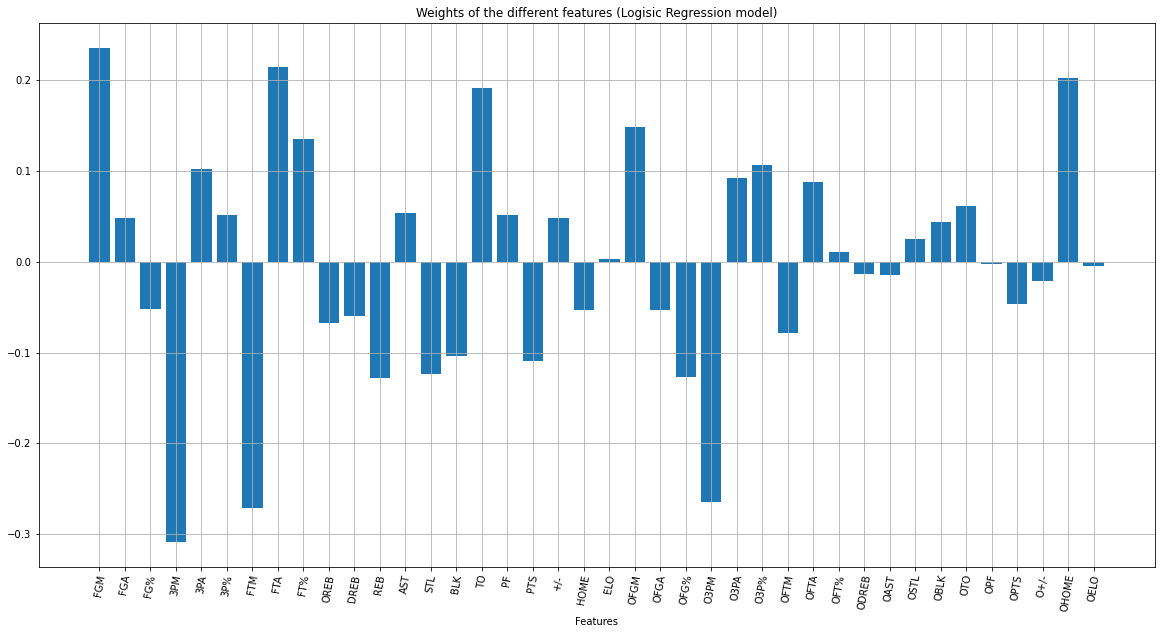

In [404]:
features = ['FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', '+/-',
       'HOME', 'ELO', 
            'OFGM', 'OFGA', 'OFG%', 'O3PM', 'O3PA', 'O3P%', 'OFTM', 'OFTA', 'OFT%',
       'OREB', 'ODREB', 'OREB', 'OAST', 'OSTL', 'OBLK', 'OTO', 'OPF', 'OPTS', 'O+/-',
       'OHOME', 'OELO']

coef_ = model_l.coef_[0]
print(coef_.shape)
print(len(features), coef_.shape[0])
fig = plt.figure(figsize = (20, 10))
plt.bar(features, coef_)
plt.xlabel('Features')
plt.title('Weights of the different features (Logisic Regression model)')
plt.xticks(rotation = 80)
plt.grid()
plt.show

In [448]:
#make it run for all teams
teams = df_teams_stats['TEAM'].unique()

best_acc = 0.1
best_team_acc = ''
best_model = ''

log_acc = []
forest_acc = []
svm_acc = []

for team in teams:
    print(team)
    pd.options.mode.chained_assignment = None
    X, y = create_new_features_for_team(new_df, team)
    print(X.shape, y.shape)
    pd.options.mode.chained_assignment = 'warn'
    scaler = StandardScaler()
    scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

    #Logistic Regression
    print('----Logistic Regression ----')

    model_l = LogisticRegression(verbose = 2, max_iter = 1000, fit_intercept = True)

    model_l.fit(X_train, y_train)

    yhat = model_l.predict(X_test)

    print('Accuracy')
    acc = np.round_(y_test[yhat == y_test].shape[0] / y_test.shape[0], 2)
    log_acc.append(acc)
    print(acc)
    print('')
    print('Classification report')
    print(classification_report(y_test, yhat))
    
    if acc > best_acc:
        best_acc = acc
        best_team_acc = team
        best_model = 'Logistic Regression'


    #Random Forest
    print('----Random Forest-----')
    model_r = RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_depth = 10)

    model_r.fit(X_train, y_train)
    yhat = model_r.predict(X_test)

    print('Accuracy')
    acc = np.round_(y_test[yhat == y_test].shape[0] / y_test.shape[0], 2)
    forest_acc.append(acc)
    print(acc)
    
    if acc > best_acc:
        best_acc = acc
        best_team_acc = team
        best_model = 'Random Forest'
        
    print('')
    print('Classification report')
    print(classification_report(y_test, yhat))

    #SVM
    print('----SVM-----')
    y_train[y_train == 0] =  -1
    y_test[y_test == 0] = -1
    model_s = SVC(kernel = 'poly', C = 1, max_iter = 400)
    model_s.fit(X_train, y_train)

    yhat = model_s.predict(X_test)

    y_test[y_test == -1] = 0
    yhat[yhat == -1] = 0

    print('Accuracy')
    acc = np.round_(y_test[yhat == y_test].shape[0] / y_test.shape[0], 2)
    svm_acc.append(acc)
    print(acc)
    
    if acc > best_acc:
        best_acc = acc
        best_team_acc = team
        best_model = 'SVM'
    
    print('')
    print('Classification report')
    print(classification_report(y_test, yhat))
    
    
log_acc = np.array(log_acc)
forest_acc = np.array(forest_acc)
svm_acc = np.array(svm_acc)

print('---Max accuracy -----')
print(best_acc)
print(best_team_acc)
print(best_model)

print('--- Recap of acc -----')
print('Logistic regression')
df_print = pd.DataFrame(log_acc.reshape(1, -1), columns = teams)

print(df_print)

print('worst werformance')
min_acc = min(log_acc)
idx_min_acc_team = np.argmin(log_acc)
min_acc_team = teams[idx_min_acc_team]
print(min_acc)
print(min_acc_team)
print('')
print('')

print('Random Forest')
df_print = pd.DataFrame(forest_acc.reshape(1, -1), columns = teams)
print(df_print)

print('worst performance')
min_acc = min(forest_acc)
idx_min_acc_team = np.argmin(forest_acc)
min_acc_team = teams[idx_min_acc_team]
print(min_acc)
print(min_acc_team)
print('')
print('')

print('SVM')
df_print = pd.DataFrame(svm_acc.reshape(1, -1), columns = teams)
print(df_print)

print('worst werformance')
min_acc = min(svm_acc)
idx_min_acc_team = np.argmin(svm_acc)
min_acc_team = teams[idx_min_acc_team]
print(min_acc)
print(min_acc_team)
print('')
print('')

print('---Average accuracy ----')
print('Logistic regression')
print(np.mean(log_acc))
print('Random Forest')
print(np.mean(forest_acc))
print('SVM')
print(np.mean(svm_acc))

Lakers
(817, 42) (817,)
----Logistic Regression ----


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s finished


Accuracy
0.55

Classification report
              precision    recall  f1-score   support

           0       0.60      0.59      0.59        90
           1       0.51      0.51      0.51        74

    accuracy                           0.55       164
   macro avg       0.55      0.55      0.55       164
weighted avg       0.56      0.55      0.56       164

----Random Forest-----
Accuracy
0.64

Classification report
              precision    recall  f1-score   support

           0       0.67      0.68      0.67        90
           1       0.60      0.59      0.60        74

    accuracy                           0.64       164
   macro avg       0.64      0.64      0.64       164
weighted avg       0.64      0.64      0.64       164

----SVM-----
Accuracy
0.64

Classification report
              precision    recall  f1-score   support

           0       0.68      0.64      0.66        90
           1       0.59      0.64      0.61        74

    accuracy                       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s finished


Accuracy
0.61

Classification report
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        71
           1       0.64      0.73      0.68        93

    accuracy                           0.61       164
   macro avg       0.60      0.59      0.59       164
weighted avg       0.60      0.61      0.60       164

----Random Forest-----
Accuracy
0.59

Classification report
              precision    recall  f1-score   support

           0       0.53      0.34      0.41        71
           1       0.61      0.77      0.68        93

    accuracy                           0.59       164
   macro avg       0.57      0.56      0.55       164
weighted avg       0.57      0.59      0.56       164

----SVM-----
Accuracy
0.63

Classification report
              precision    recall  f1-score   support

           0       0.65      0.34      0.44        71
           1       0.63      0.86      0.73        93

    accuracy                       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished


Accuracy
0.64

Classification report
              precision    recall  f1-score   support

           0       0.61      0.48      0.54        73
           1       0.65      0.76      0.70        92

    accuracy                           0.64       165
   macro avg       0.63      0.62      0.62       165
weighted avg       0.63      0.64      0.63       165

----Random Forest-----
Accuracy
0.59

Classification report
              precision    recall  f1-score   support

           0       0.55      0.41      0.47        73
           1       0.61      0.73      0.66        92

    accuracy                           0.59       165
   macro avg       0.58      0.57      0.57       165
weighted avg       0.58      0.59      0.58       165

----SVM-----
Accuracy
0.65

Classification report
              precision    recall  f1-score   support

           0       0.73      0.33      0.45        73
           1       0.63      0.90      0.74        92

    accuracy                       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished


Accuracy
0.7

Classification report
              precision    recall  f1-score   support

           0       0.71      0.82      0.76        98
           1       0.65      0.52      0.58        66

    accuracy                           0.70       164
   macro avg       0.68      0.67      0.67       164
weighted avg       0.69      0.70      0.69       164

----Random Forest-----
Accuracy
0.62

Classification report
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        98
           1       0.54      0.38      0.45        66

    accuracy                           0.62       164
   macro avg       0.60      0.58      0.58       164
weighted avg       0.61      0.62      0.61       164

----SVM-----
Accuracy
0.6

Classification report


C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      1.00      0.75        98
           1       0.00      0.00      0.00        66

    accuracy                           0.60       164
   macro avg       0.30      0.50      0.37       164
weighted avg       0.36      0.60      0.45       164

Clippers
(819, 42) (819,)
----Logistic Regression ----


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished


Accuracy
0.59

Classification report
              precision    recall  f1-score   support

           0       0.42      0.26      0.32        62
           1       0.63      0.78      0.70       102

    accuracy                           0.59       164
   macro avg       0.53      0.52      0.51       164
weighted avg       0.55      0.59      0.56       164

----Random Forest-----
Accuracy
0.55

Classification report
              precision    recall  f1-score   support

           0       0.32      0.18      0.23        62
           1       0.61      0.77      0.68       102

    accuracy                           0.55       164
   macro avg       0.47      0.48      0.46       164
weighted avg       0.50      0.55      0.51       164

----SVM-----
Accuracy
0.62

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.62      1.00      0.77       102

    accuracy                       

C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(821, 42) (821,)
----Logistic Regression ----


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s finished


Accuracy
0.69

Classification report
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        93
           1       0.67      0.57      0.62        72

    accuracy                           0.69       165
   macro avg       0.69      0.68      0.68       165
weighted avg       0.69      0.69      0.69       165

----Random Forest-----
Accuracy
0.67

Classification report
              precision    recall  f1-score   support

           0       0.68      0.78      0.73        93
           1       0.66      0.53      0.58        72

    accuracy                           0.67       165
   macro avg       0.67      0.66      0.66       165
weighted avg       0.67      0.67      0.67       165

----SVM-----
Accuracy
0.64

Classification report
              precision    recall  f1-score   support

           0       0.70      0.62      0.66        93
           1       0.57      0.65      0.61        72

    accuracy                       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s finished


Accuracy
0.55

Classification report
              precision    recall  f1-score   support

           0       0.54      0.53      0.54        81
           1       0.56      0.57      0.56        84

    accuracy                           0.55       165
   macro avg       0.55      0.55      0.55       165
weighted avg       0.55      0.55      0.55       165

----Random Forest-----
Accuracy
0.62

Classification report
              precision    recall  f1-score   support

           0       0.65      0.51      0.57        81
           1       0.61      0.74      0.67        84

    accuracy                           0.62       165
   macro avg       0.63      0.62      0.62       165
weighted avg       0.63      0.62      0.62       165

----SVM-----
Accuracy
0.61

Classification report
              precision    recall  f1-score   support

           0       0.61      0.57      0.59        81
           1       0.61      0.64      0.62        84

    accuracy                       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s finished


Accuracy
0.65

Classification report
              precision    recall  f1-score   support

           0       0.60      0.57      0.59        72
           1       0.68      0.71      0.69        92

    accuracy                           0.65       164
   macro avg       0.64      0.64      0.64       164
weighted avg       0.64      0.65      0.65       164

----Random Forest-----
Accuracy
0.67

Classification report
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        72
           1       0.71      0.71      0.71        92

    accuracy                           0.67       164
   macro avg       0.67      0.67      0.67       164
weighted avg       0.67      0.67      0.67       164

----SVM-----
Accuracy
0.7

Classification report
              precision    recall  f1-score   support

           0       0.69      0.58      0.63        72
           1       0.71      0.79      0.75        92

    accuracy                        

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s finished


Accuracy
0.67

Classification report
              precision    recall  f1-score   support

           0       0.69      0.74      0.72        92
           1       0.64      0.58      0.61        72

    accuracy                           0.67       164
   macro avg       0.67      0.66      0.66       164
weighted avg       0.67      0.67      0.67       164

----Random Forest-----
Accuracy
0.67

Classification report
              precision    recall  f1-score   support

           0       0.68      0.77      0.72        92
           1       0.65      0.54      0.59        72

    accuracy                           0.67       164
   macro avg       0.67      0.66      0.66       164
weighted avg       0.67      0.67      0.67       164

----SVM-----
Accuracy
0.7

Classification report
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        92
           1       0.70      0.54      0.61        72

    accuracy                        

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s finished


Accuracy
0.61

Classification report
              precision    recall  f1-score   support

           0       0.53      0.36      0.43        67
           1       0.64      0.78      0.70        97

    accuracy                           0.61       164
   macro avg       0.59      0.57      0.57       164
weighted avg       0.60      0.61      0.59       164

----Random Forest-----
Accuracy
0.62

Classification report
              precision    recall  f1-score   support

           0       0.55      0.33      0.41        67
           1       0.64      0.81      0.71        97

    accuracy                           0.62       164
   macro avg       0.59      0.57      0.56       164
weighted avg       0.60      0.62      0.59       164

----SVM-----
Accuracy
0.59

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.59      1.00      0.74        97

    accuracy                       

C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(822, 42) (822,)
----Logistic Regression ----


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s finished


Accuracy
0.68

Classification report
              precision    recall  f1-score   support

           0       0.71      0.76      0.74        97
           1       0.62      0.56      0.59        68

    accuracy                           0.68       165
   macro avg       0.67      0.66      0.66       165
weighted avg       0.68      0.68      0.68       165

----Random Forest-----
Accuracy
0.65

Classification report
              precision    recall  f1-score   support

           0       0.68      0.76      0.72        97
           1       0.59      0.49      0.53        68

    accuracy                           0.65       165
   macro avg       0.63      0.62      0.63       165
weighted avg       0.64      0.65      0.64       165

----SVM-----
Accuracy
0.7

Classification report
              precision    recall  f1-score   support

           0       0.69      0.91      0.78        97
           1       0.76      0.41      0.53        68

    accuracy                        

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished


Accuracy
0.59

Classification report
              precision    recall  f1-score   support

           0       0.56      0.55      0.56        76
           1       0.62      0.63      0.63        89

    accuracy                           0.59       165
   macro avg       0.59      0.59      0.59       165
weighted avg       0.59      0.59      0.59       165

----Random Forest-----
Accuracy
0.59

Classification report
              precision    recall  f1-score   support

           0       0.57      0.43      0.49        76
           1       0.60      0.72      0.65        89

    accuracy                           0.59       165
   macro avg       0.58      0.58      0.57       165
weighted avg       0.58      0.59      0.58       165

----SVM-----
Accuracy
0.61

Classification report
              precision    recall  f1-score   support

           0       0.61      0.41      0.49        76
           1       0.61      0.78      0.68        89

    accuracy                       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s finished


Accuracy
0.62

Classification report
              precision    recall  f1-score   support

           0       0.67      0.76      0.72       102
           1       0.51      0.40      0.45        63

    accuracy                           0.62       165
   macro avg       0.59      0.58      0.58       165
weighted avg       0.61      0.62      0.61       165

----Random Forest-----
Accuracy
0.65

Classification report
              precision    recall  f1-score   support

           0       0.68      0.80      0.74       102
           1       0.56      0.40      0.46        63

    accuracy                           0.65       165
   macro avg       0.62      0.60      0.60       165
weighted avg       0.63      0.65      0.63       165

----SVM-----
Accuracy
0.62

Classification report
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       102
           1       0.00      0.00      0.00        63

    accuracy                       

C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(818, 42) (818,)
----Logistic Regression ----


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished


Accuracy
0.59

Classification report
              precision    recall  f1-score   support

           0       0.62      0.68      0.65        93
           1       0.52      0.46      0.49        71

    accuracy                           0.59       164
   macro avg       0.57      0.57      0.57       164
weighted avg       0.58      0.59      0.58       164

----Random Forest-----
Accuracy
0.64

Classification report
              precision    recall  f1-score   support

           0       0.66      0.75      0.70        93
           1       0.60      0.49      0.54        71

    accuracy                           0.64       164
   macro avg       0.63      0.62      0.62       164
weighted avg       0.64      0.64      0.63       164

----SVM-----
Accuracy
0.59

Classification report
              precision    recall  f1-score   support

           0       0.59      0.95      0.72        93
           1       0.64      0.13      0.21        71

    accuracy                       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s finished


Accuracy
0.59

Classification report
              precision    recall  f1-score   support

           0       0.50      0.32      0.39        68
           1       0.62      0.77      0.69        97

    accuracy                           0.59       165
   macro avg       0.56      0.55      0.54       165
weighted avg       0.57      0.59      0.57       165

----Random Forest-----
Accuracy
0.62

Classification report
              precision    recall  f1-score   support

           0       0.56      0.35      0.43        68
           1       0.64      0.80      0.71        97

    accuracy                           0.62       165
   macro avg       0.60      0.58      0.57       165
weighted avg       0.61      0.62      0.60       165

----SVM-----
Accuracy
0.59

Classification report
              precision    recall  f1-score   support

           0       0.56      0.07      0.13        68
           1       0.60      0.96      0.74        97

    accuracy                       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished


Accuracy
0.62

Classification report
              precision    recall  f1-score   support

           0       0.52      0.27      0.35        63
           1       0.65      0.84      0.73       101

    accuracy                           0.62       164
   macro avg       0.58      0.56      0.54       164
weighted avg       0.60      0.62      0.59       164

----Random Forest-----
Accuracy
0.6

Classification report
              precision    recall  f1-score   support

           0       0.44      0.19      0.27        63
           1       0.63      0.85      0.72       101

    accuracy                           0.60       164
   macro avg       0.54      0.52      0.49       164
weighted avg       0.56      0.60      0.55       164

----SVM-----
Accuracy
0.62

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.62      1.00      0.76       101

    accuracy                        

C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(820, 42) (820,)
----Logistic Regression ----


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s finished


Accuracy
0.7

Classification report
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        79
           1       0.69      0.78      0.73        85

    accuracy                           0.70       164
   macro avg       0.70      0.70      0.70       164
weighted avg       0.70      0.70      0.70       164

----Random Forest-----
Accuracy
0.71

Classification report
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        79
           1       0.72      0.72      0.72        85

    accuracy                           0.71       164
   macro avg       0.71      0.71      0.71       164
weighted avg       0.71      0.71      0.71       164

----SVM-----
Accuracy
0.7

Classification report
              precision    recall  f1-score   support

           0       0.71      0.65      0.68        79
           1       0.70      0.75      0.72        85

    accuracy                         

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s finished


Accuracy
0.63

Classification report
              precision    recall  f1-score   support

           0       0.45      0.35      0.40        57
           1       0.69      0.78      0.73       107

    accuracy                           0.63       164
   macro avg       0.57      0.56      0.56       164
weighted avg       0.61      0.63      0.61       164

----Random Forest-----
Accuracy
0.6

Classification report
              precision    recall  f1-score   support

           0       0.38      0.25      0.30        57
           1       0.66      0.79      0.72       107

    accuracy                           0.60       164
   macro avg       0.52      0.52      0.51       164
weighted avg       0.56      0.60      0.57       164

----SVM-----
Accuracy
0.65

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.65      1.00      0.79       107

    accuracy                        

C:\Users\harol\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Prec

(822, 42) (822,)
----Logistic Regression ----


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s finished


Accuracy
0.68

Classification report
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       104
           1       0.62      0.38      0.47        61

    accuracy                           0.68       165
   macro avg       0.66      0.62      0.62       165
weighted avg       0.67      0.68      0.66       165

----Random Forest-----
Accuracy
0.64

Classification report
              precision    recall  f1-score   support

           0       0.66      0.88      0.75       104
           1       0.52      0.23      0.32        61

    accuracy                           0.64       165
   macro avg       0.59      0.55      0.54       165
weighted avg       0.61      0.64      0.59       165

----SVM-----
Accuracy
0.63

Classification report
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       104
           1       0.00      0.00      0.00        61

    accuracy                       

C:\Users\harol\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Prec

(823, 42) (823,)
----Logistic Regression ----


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s finished


Accuracy
0.66

Classification report
              precision    recall  f1-score   support

           0       0.69      0.79      0.73        98
           1       0.60      0.48      0.53        67

    accuracy                           0.66       165
   macro avg       0.65      0.63      0.63       165
weighted avg       0.65      0.66      0.65       165

----Random Forest-----
Accuracy
0.68

Classification report
              precision    recall  f1-score   support

           0       0.68      0.86      0.76        98
           1       0.67      0.42      0.51        67

    accuracy                           0.68       165
   macro avg       0.67      0.64      0.64       165
weighted avg       0.68      0.68      0.66       165

----SVM-----
Accuracy
0.64

Classification report
              precision    recall  f1-score   support

           0       0.63      0.93      0.75        98
           1       0.67      0.21      0.32        67

    accuracy                       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished


Accuracy
0.58

Classification report
              precision    recall  f1-score   support

           0       0.53      0.50      0.51        74
           1       0.61      0.64      0.62        91

    accuracy                           0.58       165
   macro avg       0.57      0.57      0.57       165
weighted avg       0.57      0.58      0.57       165

----Random Forest-----
Accuracy
0.61

Classification report
              precision    recall  f1-score   support

           0       0.59      0.45      0.51        74
           1       0.62      0.75      0.68        91

    accuracy                           0.61       165
   macro avg       0.61      0.60      0.59       165
weighted avg       0.61      0.61      0.60       165

----SVM-----
Accuracy
0.59

Classification report
              precision    recall  f1-score   support

           0       0.57      0.39      0.46        74
           1       0.61      0.76      0.67        91

    accuracy                       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s finished


Accuracy
0.6

Classification report
              precision    recall  f1-score   support

           0       0.60      0.57      0.58        81
           1       0.60      0.63      0.62        84

    accuracy                           0.60       165
   macro avg       0.60      0.60      0.60       165
weighted avg       0.60      0.60      0.60       165

----Random Forest-----
Accuracy
0.64

Classification report
              precision    recall  f1-score   support

           0       0.66      0.54      0.59        81
           1       0.62      0.73      0.67        84

    accuracy                           0.64       165
   macro avg       0.64      0.63      0.63       165
weighted avg       0.64      0.64      0.63       165

----SVM-----
Accuracy
0.58

Classification report
              precision    recall  f1-score   support

           0       0.58      0.54      0.56        81
           1       0.58      0.62      0.60        84

    accuracy                        

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s finished


Accuracy
0.6

Classification report
              precision    recall  f1-score   support

           0       0.61      0.73      0.66        89
           1       0.59      0.45      0.51        76

    accuracy                           0.60       165
   macro avg       0.60      0.59      0.59       165
weighted avg       0.60      0.60      0.59       165

----Random Forest-----
Accuracy
0.62

Classification report
              precision    recall  f1-score   support

           0       0.63      0.74      0.68        89
           1       0.62      0.49      0.54        76

    accuracy                           0.62       165
   macro avg       0.62      0.61      0.61       165
weighted avg       0.62      0.62      0.62       165

----SVM-----
Accuracy
0.66

Classification report
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        89
           1       0.67      0.51      0.58        76

    accuracy                        

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished


Accuracy
0.62

Classification report
              precision    recall  f1-score   support

           0       0.63      0.78      0.70        93
           1       0.59      0.41      0.48        71

    accuracy                           0.62       164
   macro avg       0.61      0.60      0.59       164
weighted avg       0.62      0.62      0.61       164

----Random Forest-----
Accuracy
0.62

Classification report
              precision    recall  f1-score   support

           0       0.63      0.76      0.69        93
           1       0.58      0.42      0.49        71

    accuracy                           0.62       164
   macro avg       0.61      0.59      0.59       164
weighted avg       0.61      0.62      0.60       164

----SVM-----
Accuracy
0.62

Classification report
              precision    recall  f1-score   support

           0       0.61      0.89      0.72        93
           1       0.64      0.25      0.36        71

    accuracy                       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s finished


Accuracy
0.61

Classification report
              precision    recall  f1-score   support

           0       0.62      0.60      0.61        84
           1       0.60      0.62      0.61        81

    accuracy                           0.61       165
   macro avg       0.61      0.61      0.61       165
weighted avg       0.61      0.61      0.61       165

----Random Forest-----
Accuracy
0.65

Classification report
              precision    recall  f1-score   support

           0       0.65      0.71      0.68        84
           1       0.67      0.59      0.63        81

    accuracy                           0.65       165
   macro avg       0.66      0.65      0.65       165
weighted avg       0.66      0.65      0.65       165

----SVM-----
Accuracy
0.64

Classification report
              precision    recall  f1-score   support

           0       0.65      0.62      0.63        84
           1       0.62      0.65      0.64        81

    accuracy                       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s finished


Accuracy
0.62

Classification report
              precision    recall  f1-score   support

           0       0.59      0.49      0.53        74
           1       0.63      0.73      0.68        91

    accuracy                           0.62       165
   macro avg       0.61      0.61      0.61       165
weighted avg       0.61      0.62      0.61       165

----Random Forest-----
Accuracy
0.56

Classification report
              precision    recall  f1-score   support

           0       0.52      0.39      0.45        74
           1       0.59      0.70      0.64        91

    accuracy                           0.56       165
   macro avg       0.55      0.55      0.54       165
weighted avg       0.56      0.56      0.55       165

----SVM-----
Accuracy
0.64

Classification report
              precision    recall  f1-score   support

           0       0.75      0.28      0.41        74
           1       0.61      0.92      0.74        91

    accuracy                       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s finished


Accuracy
0.66

Classification report
              precision    recall  f1-score   support

           0       0.69      0.79      0.73        98
           1       0.60      0.47      0.53        66

    accuracy                           0.66       164
   macro avg       0.64      0.63      0.63       164
weighted avg       0.65      0.66      0.65       164

----Random Forest-----
Accuracy
0.59

Classification report
              precision    recall  f1-score   support

           0       0.62      0.77      0.69        98
           1       0.48      0.32      0.38        66

    accuracy                           0.59       164
   macro avg       0.55      0.54      0.53       164
weighted avg       0.57      0.59      0.56       164

----SVM-----
Accuracy
0.6

Classification report
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        98
           1       0.00      0.00      0.00        66

    accuracy                        

C:\Users\harol\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Prec

(818, 42) (818,)
----Logistic Regression ----


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s finished


Accuracy
0.63

Classification report
              precision    recall  f1-score   support

           0       0.61      0.56      0.59        77
           1       0.64      0.69      0.66        87

    accuracy                           0.63       164
   macro avg       0.63      0.62      0.62       164
weighted avg       0.63      0.63      0.63       164

----Random Forest-----
Accuracy
0.62

Classification report
              precision    recall  f1-score   support

           0       0.59      0.62      0.60        77
           1       0.65      0.61      0.63        87

    accuracy                           0.62       164
   macro avg       0.62      0.62      0.62       164
weighted avg       0.62      0.62      0.62       164

----SVM-----
Accuracy
0.62

Classification report
              precision    recall  f1-score   support

           0       0.62      0.47      0.53        77
           1       0.61      0.75      0.67        87

    accuracy                       

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished


Accuracy
0.73

Classification report
              precision    recall  f1-score   support

           0       0.75      0.82      0.79       101
           1       0.67      0.57      0.62        63

    accuracy                           0.73       164
   macro avg       0.71      0.70      0.70       164
weighted avg       0.72      0.73      0.72       164

----Random Forest-----
Accuracy
0.73

Classification report
              precision    recall  f1-score   support

           0       0.74      0.86      0.79       101
           1       0.70      0.51      0.59        63

    accuracy                           0.73       164
   macro avg       0.72      0.68      0.69       164
weighted avg       0.72      0.73      0.71       164

----SVM-----
Accuracy
0.62

Classification report
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       101
           1       0.00      0.00      0.00        63

    accuracy                       

C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(820, 42) (820,)
----Logistic Regression ----


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\harol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished


Accuracy
0.73

Classification report
              precision    recall  f1-score   support

           0       0.67      0.52      0.59        61
           1       0.75      0.84      0.79       103

    accuracy                           0.73       164
   macro avg       0.71      0.68      0.69       164
weighted avg       0.72      0.73      0.72       164

----Random Forest-----
Accuracy
0.72

Classification report
              precision    recall  f1-score   support

           0       0.64      0.56      0.60        61
           1       0.76      0.82      0.79       103

    accuracy                           0.72       164
   macro avg       0.70      0.69      0.69       164
weighted avg       0.71      0.72      0.71       164

----SVM-----
Accuracy
0.63

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.63      1.00      0.77       103

    accuracy                       

C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   Lakers  Pacers  Celtics  Knicks  Clippers  76ers  Bulls  Raptors  \
0    0.64    0.59     0.59    0.62      0.55   0.67   0.62     0.67   

   Cavaliers  Heat  ...  Trail Blazers  Mavericks  Wizards  Nets  Hawks  \
0       0.67  0.62  ...           0.61       0.64     0.62  0.62   0.65   

   Nuggets  Pistons  Jazz  Magic  Warriors  
0     0.56     0.59  0.62   0.73      0.72  

[1 rows x 30 columns]
worst performance
0.55
Clippers


SVM
   Lakers  Pacers  Celtics  Knicks  Clippers  76ers  Bulls  Raptors  \
0    0.64    0.63     0.65     0.6      0.62   0.64   0.61      0.7   

   Cavaliers  Heat  ...  Trail Blazers  Mavericks  Wizards  Nets  Hawks  \
0        0.7  0.59  ...           0.59       0.58     0.66  0.62   0.64   

   Nuggets  Pistons  Jazz  Magic  Warriors  
0     0.64      0.6  0.62   0.62      0.63  

[1 rows x 30 columns]
worst werformance
0.58
Mavericks


---Average accuracy ----
Logistic regression
0.6333333333333333
Random Forest
0.6326666666666667
SVM
0.6310000000

Neural network to compare

In [424]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import torch.nn.functional as F

In [435]:
class TeamDataset(Dataset):
    def __init__(self, XX, yy):
        self.X = XX
        self.y = yy
    
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(42, 24)
        self.l2 = nn.Linear(24, 15)
        self.l3 = nn.Linear(15, 9)
        self.l4 = nn.Linear(9, 6)
        self.l5 = nn.Linear(6, 2)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        x = self.relu(x)
        x = self.l3(x)
        x = self.relu(x)
        x = self.l4(x)
        x = self.relu(x)
        x = self.l5(x)
        return x
    

pd.options.mode.chained_assignment = None   
X, y = create_new_features_for_team(new_df, 'Jazz')
pd.options.mode.chained_assignment = 'warn'

scaler = StandardScaler()
scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

X_train = torch.from_numpy(X_train).type(torch.float32)
X_test = torch.from_numpy(X_test).type(torch.float32)
y_train = torch.from_numpy(y_train).type(torch.int64)
y_test = torch.from_numpy(y_test).type(torch.int64)

train_dataset = TeamDataset(X_train, y_train)
test_dataset = TeamDataset(X_test, y_test)
print(len(train_dataset), len(test_dataset))


batch_size = 15
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

654 164


Epoch 100: Train Loss 0.6513741287318143  Train Acc 61.467891693115234  Test Loss 0.6477515914223411
Epoch 200: Train Loss 0.6453304460102861  Train Acc 61.62079620361328  Test Loss 0.6323414553295482
Epoch 300: Train Loss 0.6361973292448304  Train Acc 62.38532257080078  Test Loss 0.6312558244575154
Epoch 400: Train Loss 0.6344109394333579  Train Acc 62.691131591796875  Test Loss 0.6299802606756036
Epoch 500: Train Loss 0.6318496892398054  Train Acc 64.06727600097656  Test Loss 0.6328327384862033
Epoch 600: Train Loss 0.6318745680830695  Train Acc 63.14984893798828  Test Loss 0.6280996691096913
Epoch 700: Train Loss 0.6329001750458371  Train Acc 63.60856246948242  Test Loss 0.6312742829322815
Epoch 800: Train Loss 0.629946880042553  Train Acc 63.76146697998047  Test Loss 0.6342707222158258
Final Test Acc 0.6524389982223511


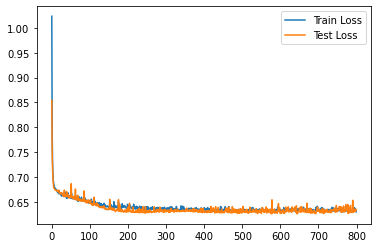

In [447]:
net = NeuralNet()

learning_rate = 0.00001
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
criterion = nn.CrossEntropyLoss()

num_epochs = 800

def train_model(model, optimizer, criterion, num_epochs, progress = False, plotting = False):

    train_loss = []
    train_accuracy = []
    test_loss = []

    for epoch in range(num_epochs):
        iter_loss = 0.0
        correct = 0
        iterations = 0

        net.train()      

        for i, (x, y_) in enumerate(train_loader):

            optimizer.zero_grad()    
            outputs = net(x)      
            loss = criterion(outputs, y_) 
            iter_loss += loss.item() 

            loss.backward()          
            optimizer.step()          


            # Record the correct predictions for training data 
            predicted = torch.max(outputs.data, 1)[1]
            correct += (predicted == y_).sum()
            iterations += 1

        # Record the training loss
        train_loss.append(iter_loss / iterations)
        # Record the training accuracy
        train_accuracy.append((100 * correct / float(len(train_dataset))).item())

        net.eval()
        iter_loss = 0.0
        iterations = 0

        for i, (x, y_) in enumerate(test_loader):
            outputs = net(x) 
            loss = criterion(outputs, y_)
            iter_loss += loss.item()
            iterations += 1

        test_loss.append(iter_loss / iterations)


        if (epoch+1) % 100 == 0:
            if progress == True:
                print('Epoch {}: Train Loss {}  Train Acc {}  Test Loss {}'.format(epoch+1, train_loss[-1], 
                                                                                   train_accuracy[-1],test_loss[-1]))

    
    net.eval()
    correct = 0
    for (x, y_) in (test_loader):
        outputs = net(x)
        predicted = torch.max(outputs.data, 1)[1]
        correct += (predicted == y_).sum()
    
    return_acc = (correct / len(test_dataset)).item()
    print('Final Test Acc {}'.format(return_acc))
    
    if plotting == True:
        plt.plot(train_loss, label = 'Train Loss')
        plt.plot(test_loss, label = 'Test Loss')
        plt.legend()
        plt.show()
    
    return return_acc

ttt = train_model(net, optimizer, criterion, num_epochs, progress = True, plotting = True)

In [449]:
#make it run over all NBA teams

teams = df_teams_stats['TEAM'].unique()
team_test_acc = []

for team in teams:
    print(team)
    pd.options.mode.chained_assignment = None   
    X, y = create_new_features_for_team(new_df, team)
    pd.options.mode.chained_assignment = 'warn'
    scaler = StandardScaler()
    scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

    X_train = torch.from_numpy(X_train).type(torch.float32)
    X_test = torch.from_numpy(X_test).type(torch.float32)
    y_train = torch.from_numpy(y_train).type(torch.int64)
    y_test = torch.from_numpy(y_test).type(torch.int64)

    train_dataset = TeamDataset(X_train, y_train)
    test_dataset = TeamDataset(X_test, y_test)


    batch_size = 15
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle = True)
    
    net = NeuralNet()

    learning_rate = 0.0001
    optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    criterion = nn.CrossEntropyLoss()
    num_epochs = 500
    
    test_acc = train_model(net, optimizer, criterion, num_epochs, progress = False, plotting = False)
    
    team_test_acc.append(test_acc)
    
team_test_acc = np.array(team_test_acc)

min_test_acc = min(team_test_acc)
arg = np.argmin(team_test_acc)
team_min = teams[arg]

max_test_acc = max(team_test_acc)
arg = np.argmax(team_test_acc)
team_max = teams[arg]

print('Minimum accuracy {} for the {}'.format(min_test_acc, team_min))
print('Maximum accuracy {} for the {}'.format(max_test_acc, team_max))

df_print = pd.DataFrame(team_test_acc.reshape(1, -1), columns = teams)
print(df_print)

Lakers
Final Test Acc 0.6829268336296082
Pacers
Final Test Acc 0.6768292784690857
Celtics
Final Test Acc 0.6303030252456665
Knicks
Final Test Acc 0.6219512224197388
Clippers
Final Test Acc 0.6463414430618286
76ers
Final Test Acc 0.6727272868156433
Bulls
Final Test Acc 0.6000000238418579
Raptors
Final Test Acc 0.6219512224197388
Cavaliers
Final Test Acc 0.5609756112098694
Heat
Final Test Acc 0.6585366129875183
Hornets
Final Test Acc 0.6181818246841431
Grizzlies
Final Test Acc 0.6363636255264282
Kings
Final Test Acc 0.678787887096405
Pelicans
Final Test Acc 0.5853658318519592
Rockets
Final Test Acc 0.6484848260879517
Thunder
Final Test Acc 0.6951219439506531
Bucks
Final Test Acc 0.5182926654815674
Spurs
Final Test Acc 0.6829268336296082
Timberwolves
Final Test Acc 0.6424242258071899
Suns
Final Test Acc 0.6969696879386902
Trail Blazers
Final Test Acc 0.5878787636756897
Mavericks
Final Test Acc 0.581818163394928
Wizards
Final Test Acc 0.6969696879386902
Nets
Final Test Acc 0.64634144306182

Now we are gonna to insert the player stats to the model.

In [ ]:
#make the same thing but with player not consistent for our project since we want the forecast 
#for the upcoming season and that the performance of a player is not always the same across this season

In [408]:
df_player_stats

,PLAYER,TEAM,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,STL,BLK,TO,PF,PTS,+/-,GAMEID,Date,HOME,WIN
0,Rajon Rondo,Celtics,34:09,5,10,50.0,0,2,0.0,0,...,1,0,6,1,10,-8,1,2010-12-15,0,1
1,Danilo Gallinari,Knicks,42:35,8,14,57.1,1,3,33.3,3,...,0,0,1,3,20,1,1,2010-12-15,1,0
2,Blake Griffin,Clippers,39:08,6,16,37.5,0,0,0.0,8,...,1,1,2,2,20,-17,2,2010-12-15,0,0
3,DeAndre Jordan,Clippers,35:29,7,7,100.0,0,0,0.0,1,...,0,3,0,4,15,1,2,2010-12-15,0,0
4,Eric Gordon,Clippers,37:08,6,18,33.3,1,5,20.0,3,...,0,0,5,1,16,-23,2,2010-12-15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113758,Damian Jones,Kings,35:56,9,13,69.2,0,2,0.0,1,...,1,1,3,4,19,-13,12517,2021-05-16,1,0
113759,Buddy Hield,Kings,30:43,5,12,41.7,1,7,14.3,2,...,1,0,1,0,13,-16,12517,2021-05-16,1,0
113760,Delon Wright,Kings,30:32,3,8,37.5,1,5,20.0,0,...,1,2,2,1,7,-14,12517,2021-05-16,1,0
113761,Terence Davis,Kings,31:48,8,14,57.1,2,5,40.0,2,...,2,0,2,3,20,-30,12517,2021-05-16,1,0


In [496]:
df_teams_2020 = select_season(df_teams_stats, 2011)
df_player_2020 = select_season(df_player_stats, 2011)
df_teams_2020[:10]
#df_teams_2020.shape[0] - 20

,TEAM,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,...,STL,BLK,TO,PF,PTS,+/-,HOME,GAMEID,Date,WIN
1730,Celtics,39,76,51.3,2,5,40.0,24,31,77.4,...,7,5,18,28,104,-2,0,868,2011-12-25,0
1731,Knicks,35,74,47.3,9,20,45.0,27,34,79.4,...,9,11,16,25,106,2,1,868,2011-12-25,1
1732,Heat,38,78,48.7,4,7,57.1,25,36,69.4,...,9,6,22,28,105,11,0,869,2011-12-25,1
1733,Mavericks,31,82,37.8,9,28,32.1,23,30,76.7,...,10,0,17,29,94,-11,1,869,2011-12-25,0
1734,Bulls,36,89,40.4,7,15,46.7,9,14,64.3,...,14,4,14,21,88,1,0,870,2011-12-25,1
1735,Lakers,36,76,47.4,4,16,25.0,11,20,55.0,...,6,8,17,20,87,-1,1,870,2011-12-25,0
1736,Magic,30,81,37.0,8,28,28.6,21,26,80.8,...,7,4,18,25,89,-8,0,871,2011-12-25,0
1737,Thunder,34,72,47.2,10,19,52.6,19,26,73.1,...,8,5,16,22,97,8,1,871,2011-12-25,1
1738,Clippers,37,81,45.7,8,23,34.8,23,38,60.5,...,9,8,10,19,105,19,0,872,2011-12-25,1
1739,Warriors,32,82,39.0,5,21,23.8,17,24,70.8,...,4,8,16,32,86,-19,1,872,2011-12-25,0


In [497]:
df_player_2020[:20]
#df_player_2020.shape[0] - 20

,PLAYER,TEAM,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,STL,BLK,TO,PF,PTS,+/-,GAMEID,Date,HOME,WIN
2481,Rajon Rondo,Celtics,41:16,11,19,57.9,0,1,0.0,9,...,5,0,5,2,31,3,867,2011-12-25,0,0
2482,Avery Bradley,Celtics,8:49,0,2,0.0,0,0,0.0,0,...,0,0,1,0,0,-5,867,2011-12-25,0,0
2483,E'Twaun Moore,Celtics,0:04,0,0,0.0,0,0,0.0,0,...,0,0,0,0,0,0,867,2011-12-25,0,0
2484,Carmelo Anthony,Knicks,33:35,10,17,58.8,4,7,57.1,13,...,2,1,5,4,37,15,867,2011-12-25,1,1
2485,LeBron James,Heat,36:16,11,19,57.9,0,0,0.0,15,...,2,2,3,3,37,27,868,2011-12-25,0,1
2486,Udonis Haslem,Heat,32:16,3,6,50.0,0,0,0.0,3,...,0,1,3,5,9,-4,868,2011-12-25,0,1
2487,Derrick Rose,Bulls,35:19,9,13,69.2,4,6,66.7,0,...,0,1,5,1,22,7,869,2011-12-25,0,1
2488,Taj Gibson,Bulls,15:28,1,4,25.0,0,0,0.0,1,...,0,1,0,1,3,-1,869,2011-12-25,0,1
2489,Dwight Howard,Magic,38:27,4,12,33.3,0,1,0.0,3,...,1,2,3,4,11,-4,870,2011-12-25,0,0
2490,Kevin Durant,Thunder,37:02,11,19,57.9,2,4,50.0,6,...,2,0,4,1,30,2,870,2011-12-25,1,1


In [500]:
def following_ids(df_teams_stats, df_player_stats):
    game_ids = list(df_teams_stats['GAMEID'])
    for game_id in game_ids:
        last_game_id_team_row = df_teams_stats.loc[df_teams_stats['GAMEID'] == game_id]
        last_game_id_team_row = last_game_id_team_row.iloc[-1]['TEAM']
        
        first_game_id_team_row = df_teams_stats.loc[df_teams_stats['GAMEID'] == game_id]
        first_game_id_team_row = first_game_id_team_row.iloc[0]['TEAM']
        
        last_game_id_player_row = df_player_stats.loc[df_player_stats['GAMEID'] == game_id]
        
        if last_game_id_player_row.shape[0] == 0:    
            continue
        
        last_game_id_player_row = last_game_id_player_row.iloc[-1]['TEAM']
        
        
        if last_game_id_team_row != last_game_id_player_row :
            if last_game_id_player_row != first_game_id_team_row :
                print(last_game_id_team_row)
                print(last_game_id_player_row)
                return game_id

print(following_ids(df_teams_stats, df_player_stats))

def balance_ids(df_player_stats):
    #go from 2010 season to 2011 creates some inconsitency
    df_player_stats_copy = df_player_stats.copy()
    pivot_id = 867
    df_player_stats_copy.loc[df_player_stats_copy['GAMEID'] >= pivot_id, 'GAMEID'] += 1
    return df_player_stats_copy

df_player_stats = balance_ids(df_player_stats)

Kings
Knicks
867


In [501]:
df_teams_2020 = select_season(df_teams_stats, 2020)
df_player_2020 = select_season(df_player_stats, 2020)

In [506]:
df_player_2020[:5]

,PLAYER,TEAM,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,STL,BLK,TO,PF,PTS,+/-,GAMEID,Date,HOME,WIN
94668,Andrew Wiggins,Warriors,31:14,4,16,25.0,2,6,33.3,3,...,0,1,4,4,13,-28,11450,2020-12-22,0,0
94669,Eric Paschall,Warriors,21:33,2,6,33.3,1,1,100.0,1,...,0,1,0,1,6,-28,11450,2020-12-22,0,0
94670,James Wiseman,Warriors,24:17,7,13,53.8,1,1,100.0,4,...,2,0,1,2,19,-10,11450,2020-12-22,0,0
94671,Stephen Curry,Warriors,30:19,7,21,33.3,2,10,20.0,4,...,2,0,3,1,20,-23,11450,2020-12-22,0,0
94672,Kevon Looney,Warriors,11:17,2,4,50.0,0,0,0.0,0,...,0,0,2,3,4,-10,11450,2020-12-22,0,0


In [504]:
df_teams_2020[:5]

,TEAM,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,...,STL,BLK,TO,PF,PTS,+/-,HOME,GAMEID,Date,WIN
22776,Warriors,37,99,37.4,10,33,30.3,15,23,65.2,...,6,6,18,24,99,-26,0,11450,2020-12-22,0
22777,Nets,42,92,45.7,15,35,42.9,26,32,81.3,...,11,7,20,22,125,26,1,11450,2020-12-22,1
22778,Clippers,44,93,47.3,14,40,35.0,14,19,73.7,...,10,3,16,29,116,7,0,11451,2020-12-22,1
22779,Lakers,38,81,46.9,9,29,31.0,24,31,77.4,...,4,2,19,20,109,-7,1,11451,2020-12-22,0
22780,Pelicans,31,78,39.7,10,35,28.6,26,33,78.8,...,8,2,19,20,98,-13,0,11452,2020-12-25,0


In [507]:
#Calculate the Player Efficiency Rating

def league_avg_stats(df_teams_stats, stat, game_id):
    
    """
    Compute the average statistics of the league before the game
    """
    
    df_teams_stats_c = df_teams_stats.copy()
    df_team_work = df_teams_stats_c.loc[df_teams_stats_c['GAMEID'] < game_id]
    
    if stat not in list(df_team_work.columns):
        raise ValueError('Please select a statistics with the same syntax as the columns of the df_teams_stats')
    
    df_team_stat = df_team_work[stat]
    return df_team_stat.mean()


def u_PER(player, team, df_teams_stats, df_player_stats, game_id):
    
    df_teams_copy = df_teams_stats.copy()
    df_player_copy = df_player_stats.copy()
    
    df_player_line = df_player_copy.loc[(df_player_copy['PLAYER'] == player) & 
                                        (df_player_copy['GAMEID'] == game_id)]
    
    df_team_line = df_teams_copy.loc[(df_teams_copy['TEAM'] == team) &
                                    (df_teams_copy['GAMEID'] == game_id)]
    
    print(df_player_line)
    print(df_team_line)
    
u_PER('Andrew Wiggins', 'Warriors', df_teams_stats, df_player_stats, 11450)

               PLAYER      TEAM    MIN  FGM  FGA   FG%  3PM  3PA   3P%  FTM  \
94668  Andrew Wiggins  Warriors  31:14    4   16  25.0    2    6  33.3    3   

       ...  STL  BLK  TO  PF  PTS  +/-  GAMEID       Date  HOME  WIN  
94668  ...    0    1   4   4   13  -28   11450 2020-12-22     0    0  

[1 rows x 26 columns]
           TEAM  FGM  FGA   FG%  3PM  3PA   3P%  FTM  FTA   FT%  ...  STL  \
22776  Warriors   37   99  37.4   10   33  30.3   15   23  65.2  ...    6   

       BLK  TO  PF  PTS  +/-  HOME  GAMEID       Date  WIN  
22776    6  18  24   99  -26     0   11450 2020-12-22    0  

[1 rows x 24 columns]
